In [24]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
df1 = pd.read_excel('../data/TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx', sheet_name='Compiled_IFSP Teaming')

In [7]:
df1.head()

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
0,457136,2022-01-21,09:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,2022-01-21 17:54:45,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
1,457136,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
2,457585,2022-01-24,08:30:00,09:30:00,Telehealth,Service Delivered,MILLARDCATHERINE,2022-01-24 14:18:29,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
3,457852,2022-01-12,14:00:00,15:00:00,Community-based,Service Delivered,HEMELKATIE1,2022-01-18 10:39:51,IEP Meeting,LTVEC,EIRA,Dev. Therapy Prof - Home/Community
4,458051,2022-01-12,12:00:00,13:00:00,Telehealth,Service Delivered,JONESMEGAN,2022-01-12 13:46:48,IFSP Meeting,"First Steps, Inc (EIRA)",EIRA,Dev. Therapy Prof - Home/Community


In [10]:
df2 = pd.read_excel('../data/TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx', sheet_name='All Children with IFSPs')

C:\Users\scost\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [12]:
df2.head()

,POE,Child ID,Referral Date,Exit Date
0,ET,508615,2021-08-06,NaT
1,ET,488455,2021-11-02,NaT
2,ET,494500,2020-12-14,NaT
3,ET,515143,2021-11-22,NaT
4,ET,505490,2021-06-15,NaT


In [15]:
null_counts1 = df1.isnull().sum()  # Count the number of null values in each column

In [16]:
null_counts1

CHILD_ID                 0
SERVICE_DATE             0
START_TIME              11
END_TIME                11
SERVICE_SETTING         10
SERVICE DELIVERY         0
ADD_USER                 0
ADD_DATE                 0
IFSP Teaming ID name     0
Agency Name              0
Agency Type              0
Service Name             0
dtype: int64

In [17]:
null_counts2 = df2.isnull().sum()  # Count the number of null values in each column

In [18]:
null_counts2

POE                   0
Child ID              0
Referral Date         0
Exit Date        123057
dtype: int64

In [19]:
df1.describe()


,CHILD_ID
count,9543.000000
mean,503923.012051
std,17148.944343
min,457136.000000
25%,492312.500000
50%,505531.000000
75%,515686.000000
max,542122.000000


In [20]:
df2.describe()


,Child ID
count,138664.000000
mean,510126.171011
std,17562.986428
min,453337.000000
25%,498167.000000
50%,511861.000000
75%,524319.000000
max,546235.000000


=== SERVICE_SETTING ===
Home               4010
Telehealth         3604
Community-based    1291
Other               628
Name: SERVICE_SETTING, dtype: int64



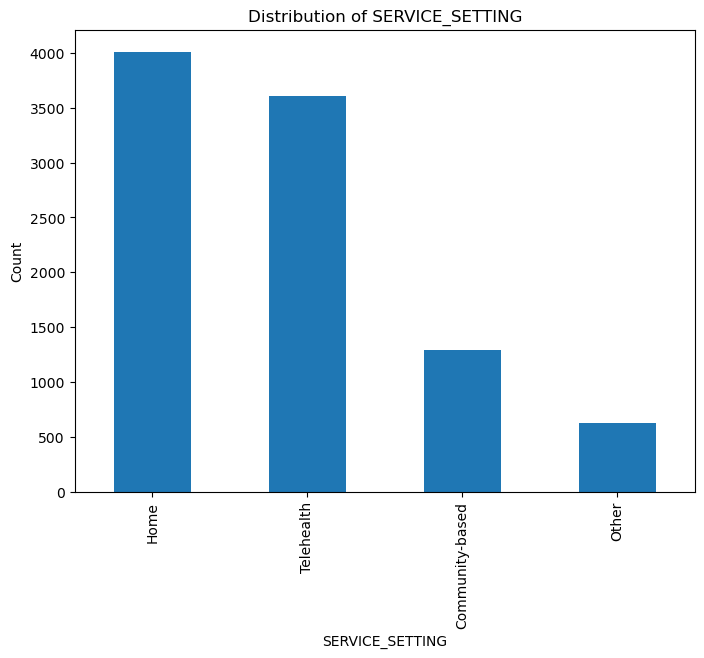

=== SERVICE DELIVERY ===
Service Delivered          9532
Absence Due to Family         6
Absence Due to Provider       3
Family No Show                2
Name: SERVICE DELIVERY, dtype: int64



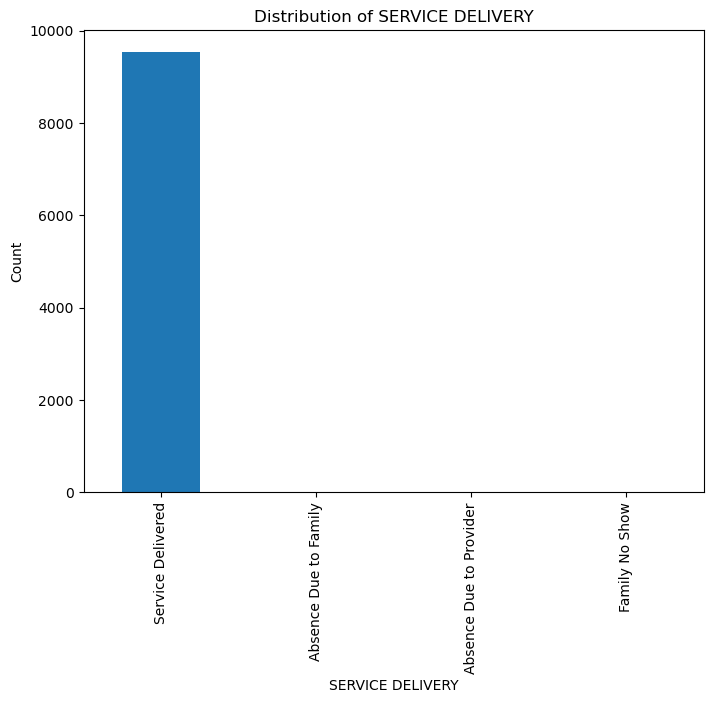

=== Agency Name ===
LeBonheur EI & Dev (LEAD) (vendor)                   924
Emory Valley Center                                  730
Siskin Children's Institute (EIRA)                   685
Physical Therapy Services, PA (EIRA)                 589
LeBonheur EI & Dev (LEAD) (EIRA)                     505
                                                    ... 
Words for Life Speech & Language Center, LLC           1
Jeannine Couvertiere, SLP Services                     1
Choice Medical Inc / Choice Orthotics Prosthetics      1
Blount Memorial Hospital                               1
Therapy.Works LLC                                      1
Name: Agency Name, Length: 85, dtype: int64



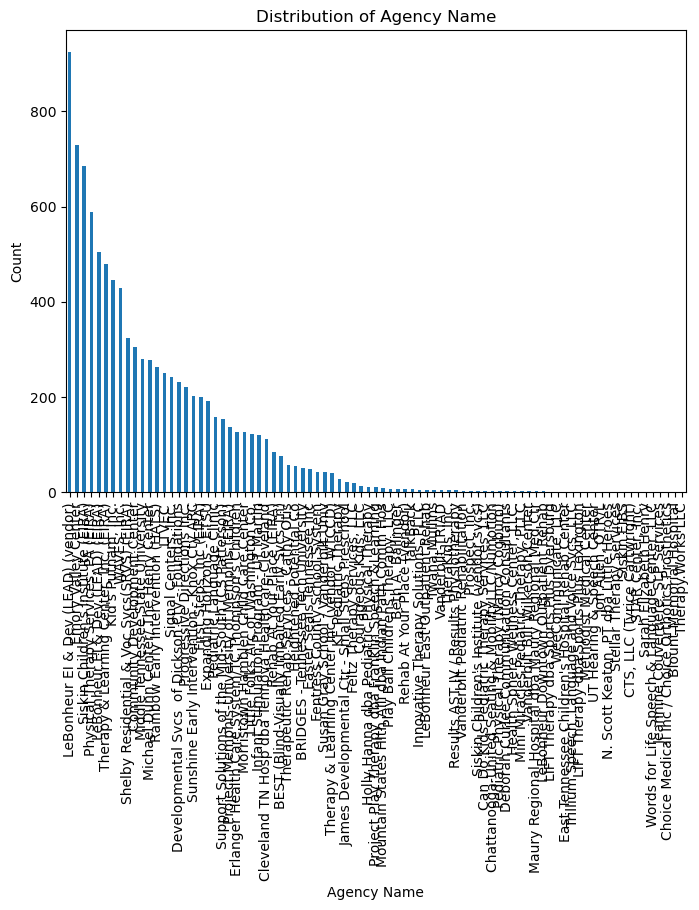

=== Agency Type ===
EIRA           8037
Independent    1505
Other             1
Name: Agency Type, dtype: int64



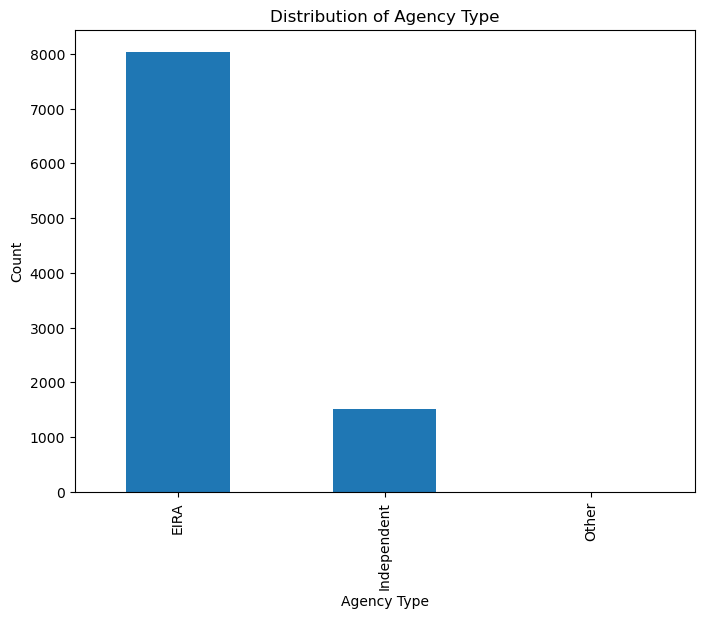

=== Service Name ===
Dev. Therapy Prof - Home/Community               7671
Occupational Therapy                              515
Speech Therapy                                    448
Physical Therapy                                  316
Dev. Therapy Center-Based                         154
Dev. Therapy - BCBA                               144
Eval/Assess - Developmental                        72
Vision Services                                    63
Physical Therapy Assistant                         32
Evaluation - Occupational Therapy                  26
IFSP Team Member Participation (Virtual)           20
IFSP Team Member Participation (Face-To-Face)      20
Evaluation - Speech Therapy                        16
Evaluation - Physical Therapy                      15
Dev. Therapy – Registered Behavior Tech (RBT)      11
Dev. Therapy - Behavior                             5
Consultation – Developmental Therapy                4
Assistive Technology                                3
Evaluat

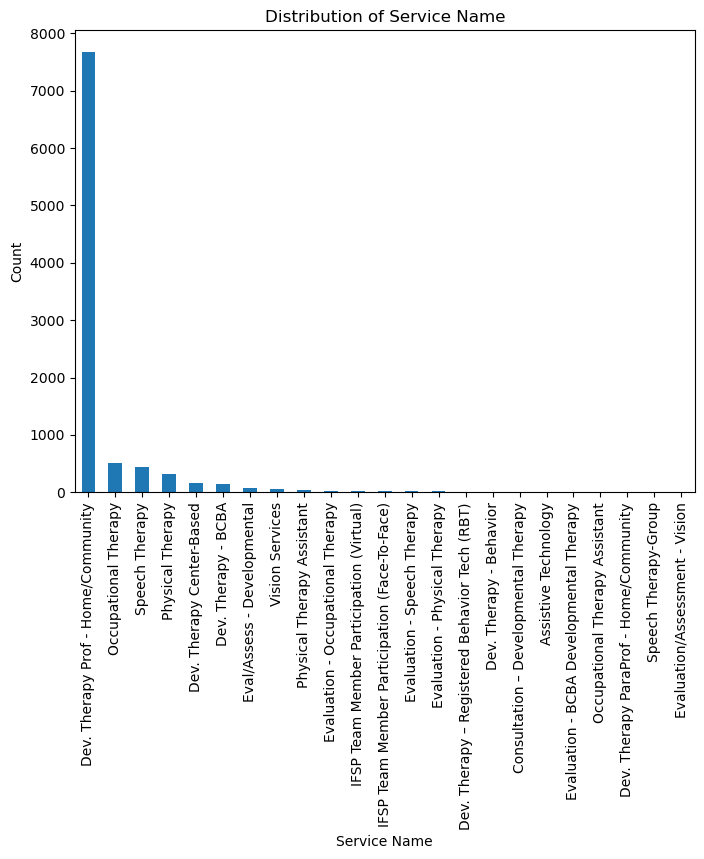

In [25]:
# Analyze the distribution of categorical variables
categorical_cols = ['SERVICE_SETTING', 'SERVICE DELIVERY', 'Agency Name', 'Agency Type', 'Service Name']

for col in categorical_cols:
    value_counts = df1[col].value_counts()
    print(f"=== {col} ===")
    print(value_counts)
    print()

    # Plotting the distribution
    plt.figure(figsize=(8, 6))
    value_counts.plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

* Children can have up to 6 co-visits per year. How many are recieving all 6 visits? Are there any who are exceeding 6 visits?